In [7]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt


In [8]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def fprime(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

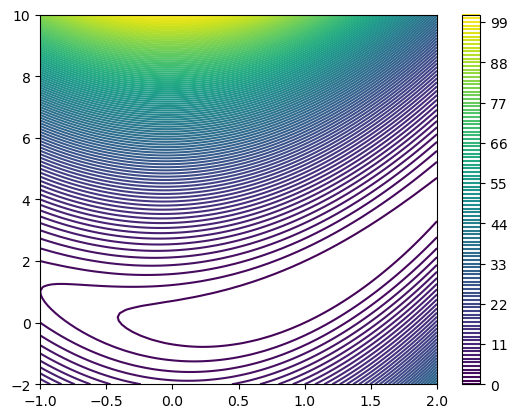

In [9]:
# plot the function f(x)
x = np.linspace(-1, 2, 100)
y = np.linspace(-2, 10, 100)

X, Y = np.meshgrid(x, y)
Z = np.zeros((x.size, y.size))
for i in range(x.size):
    for j in range(y.size):
        Z[i, j] = f((x[i], y[j]))

plt.contour(X, Y, Z.T, 100);
plt.colorbar()
plt.show()

In [10]:
# using scipy.optimize is easy when we have access to f
optimize.minimize(f, [2, 2], method='BFGS')

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.783807569894432e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 8
      jac: [ 9.881e-07  2.417e-06]
 hess_inv: [[ 9.549e-01  1.900e+00]
            [ 1.900e+00  4.279e+00]]
     nfev: 27
     njev: 9

(-3.0, 6.0, -2.5, 5.0)

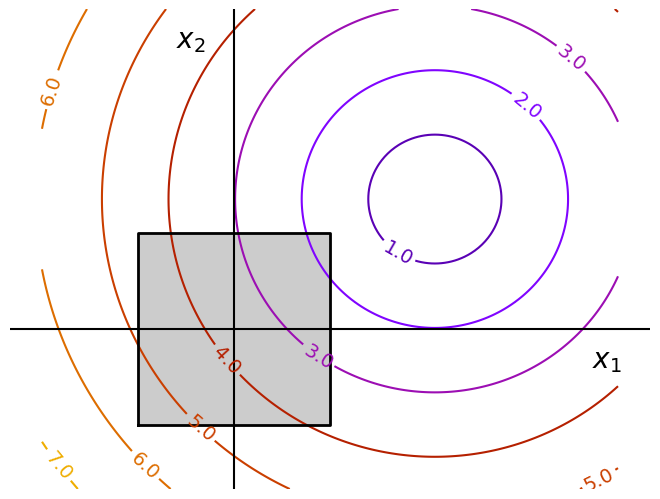

In [11]:
import numpy as np
import pylab as pl
from scipy import optimize

x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T

# Create 2 figure: only the second one will have the optimization
# path
pl.clf()
pl.axes([0, 0, 1, 1])

contours = pl.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                    extent=[-3, 6, -2.5, 5],
                    cmap=pl.cm.gnuplot)
pl.clabel(contours,
        inline=1,
        fmt='%1.1f',
        fontsize=14)
pl.plot([-1.5, -1.5,  1.5,  1.5, -1.5],
        [-1.5,  1.5,  1.5, -1.5, -1.5], 'k', linewidth=2)
pl.fill_between([ -1.5,  1.5],
                [ -1.5, -1.5],
                [  1.5,  1.5],
                color='.8')
pl.axvline(0, color='k')
pl.axhline(0, color='k')

pl.text(-.9, 4.4, '$x_2$', size=20)
pl.text(5.6, -.6, '$x_1$', size=20)
pl.axis('equal')
pl.axis('off')

In [12]:
def f(x):
    # Store the list of function calls
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)


# We don't use the gradient, as with the gradient, L-BFGS is too fast,
# and finds the optimum without showing us a pretty path
def f_prime(x):
    r = np.sqrt((x[0] - 3)**2 + (x[0] - 2)**2)
    return np.array(((x[0] - 3)/r, (x[0] - 2)/r))

In [13]:
optimize.minimize(f, np.array([0, 0]), method='L-BFGS-B',
                     bounds=((-1.5, 1.5), (-1.5, 1.5)))

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.5811388300841898
        x: [ 1.500e+00  1.500e+00]
      nit: 2
      jac: [-9.487e-01 -3.162e-01]
     nfev: 9
     njev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>